# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.interpolate  import lagrange
from scipy.interpolate import CubicSpline

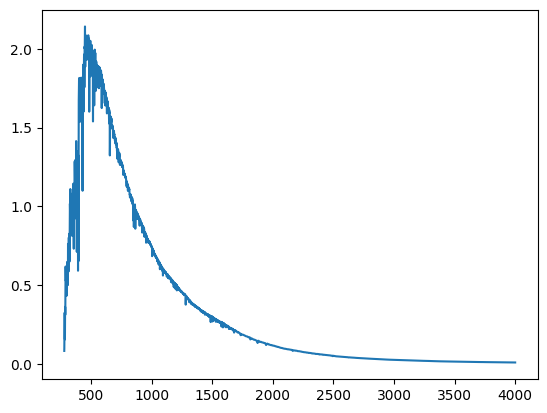

In [3]:
import requests
from io import StringIO
# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)

<ipython-input-4-01cc973bbf9d>:8: RuntimeWarning: overflow encountered in exp
  u=(8*np.pi*h*c)/(longitud**5*(np.exp((h*c)/(longitud*kB*T))-1))


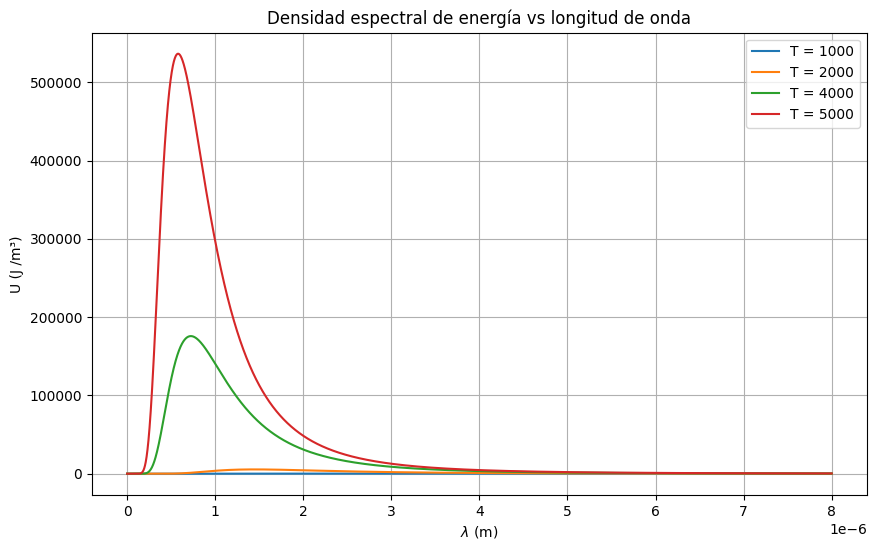

In [4]:
#1).
h=6.62607015e-34  #constante de Planck
c=299792458 #velocidad de la luz
kB=1.380649e-23  #constante de Boltzmann
sigma = 5.67e-8  #constante de Stefan-Boltzmann

def u(longitud, T):  #función densidad espectrañ
  u=(8*np.pi*h*c)/(longitud**5*(np.exp((h*c)/(longitud*kB*T))-1))
  return u

longitud_onda=np.linspace(1e-9,8e-6,10000)  #λ  entre  1nm  y  8μm
Tempt=np.array([1000,2000,4000,5000])

plt.figure(figsize=(10, 6))
for i in Tempt:
  plt.plot(longitud_onda, u(longitud_onda, i), label=f'T = {i}')

plt.title('Densidad espectral de energía vs longitud de onda')
plt.xlabel('$λ$ (m)')
plt.ylabel('U (J /m³)')
plt.legend()
plt.grid()
plt.show()

<ipython-input-4-01cc973bbf9d>:8: RuntimeWarning: overflow encountered in exp
  u=(8*np.pi*h*c)/(longitud**5*(np.exp((h*c)/(longitud*kB*T))-1))


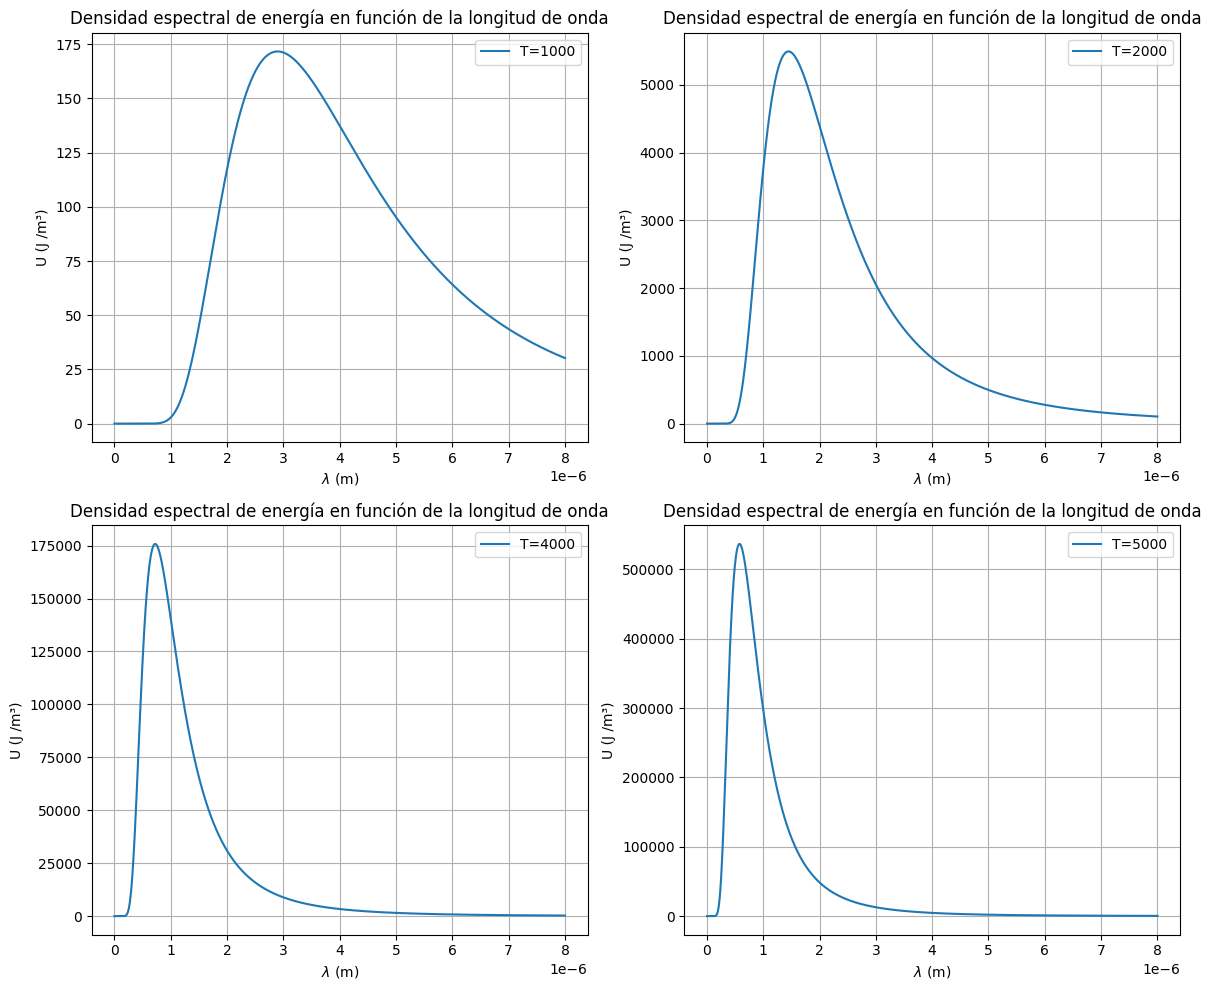

In [5]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(12,10)

for i, T in enumerate(Tempt):
 row = i // 2
 col = i % 2
 axs[row,col].plot(longitud_onda, u(longitud_onda, T), label=f'T={T}')
 axs[row,col].set_title('Densidad espectral de energía en función de la longitud de onda')
 axs[row,col].set_xlabel('$λ$ (m)')
 axs[row,col].set_ylabel('U (J /m³)')
 axs[row,col].legend()
 axs[row,col].grid()

plt.tight_layout()
plt.show()

In [6]:
#2).
for T in Tempt:  #longitud de onda para el máximo valor de cada curva
  densidad_espectral = u(longitud_onda, T)
  l_max=longitud_onda[np.argmax(densidad_espectral)]
  print(f'Para T={T} , la longitud máxima es, λmax={l_max} m')
  print(f'λmaxT = {l_max * T*1e6:.2f} μmK')

Para T=1000 , la longitud máxima es, λmax=2.8977275727572757e-06 m
λmaxT = 2897.73 μmK
Para T=2000 , la longitud máxima es, λmax=1.4489637963796378e-06 m
λmaxT = 2897.93 μmK
Para T=4000 , la longitud máxima es, λmax=7.241819181918191e-07 m
λmaxT = 2896.73 μmK
Para T=5000 , la longitud máxima es, λmax=5.793855385538553e-07 m
λmaxT = 2896.93 μmK


<ipython-input-4-01cc973bbf9d>:8: RuntimeWarning: overflow encountered in exp
  u=(8*np.pi*h*c)/(longitud**5*(np.exp((h*c)/(longitud*kB*T))-1))


In [7]:
#3).

def integrando(x):
  return x**3/(np.exp(x)-1)
def integral(P):
  I=quad(P, 0, np.inf)[0]
  return I
valor_esperado=np.pi**4/15
I=integral(integrando)
diff_relativa=(abs(I-valor_esperado)/valor_esperado)*100
print("El valor de la integral numérica es",I)
print("El valor esperado de la integral es", valor_esperado)
print("La diferenia relativa es", diff_relativa)

El valor de la integral numérica es 6.49393940226683
El valor esperado de la integral es 6.493939402266828
La diferenia relativa es 2.735407168690519e-14


<ipython-input-7-af2ad7d8edb9>:4: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x)-1)


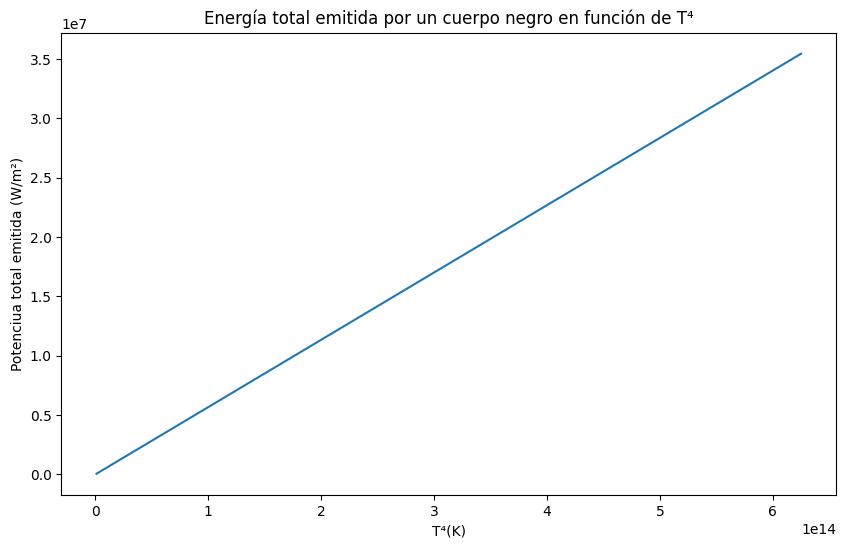

In [8]:
def Ptotal(T):       #función de la potencia total emitida por área
  P=I*c/4*(8*np.pi*kB**4*T**4)/(h*c)**3  #Constante de proporcionalidad alfa=(8*np.pi*kB**4*T**4)/(h*c)**3
  return P

P_total=[]
for i in Tempt:    #potencia total emitida pata cada valor de la temperatura
  p=Ptotal(i)
  P_total.append(p)

plt.figure(figsize=(10, 6))
plt.plot(Tempt**4,P_total)
plt.xlabel('T⁴(K)')
plt.ylabel('Potenciua total emitida (W/m²)')
plt.title('Energía total emitida por un cuerpo negro en función de T⁴')
plt.show()

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [9]:
url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\s+', header=None, skiprows=5)
data.columns = ["Año", "NoSauvizado", "Promedio_5"]
data

,Año,NoSauvizado,Promedio_5
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.21
4,1884,-0.29,-0.24
...,...,...,...
139,2019,0.98,0.94
140,2020,1.02,0.95
141,2021,0.85,0.98
142,2022,0.90,1.00


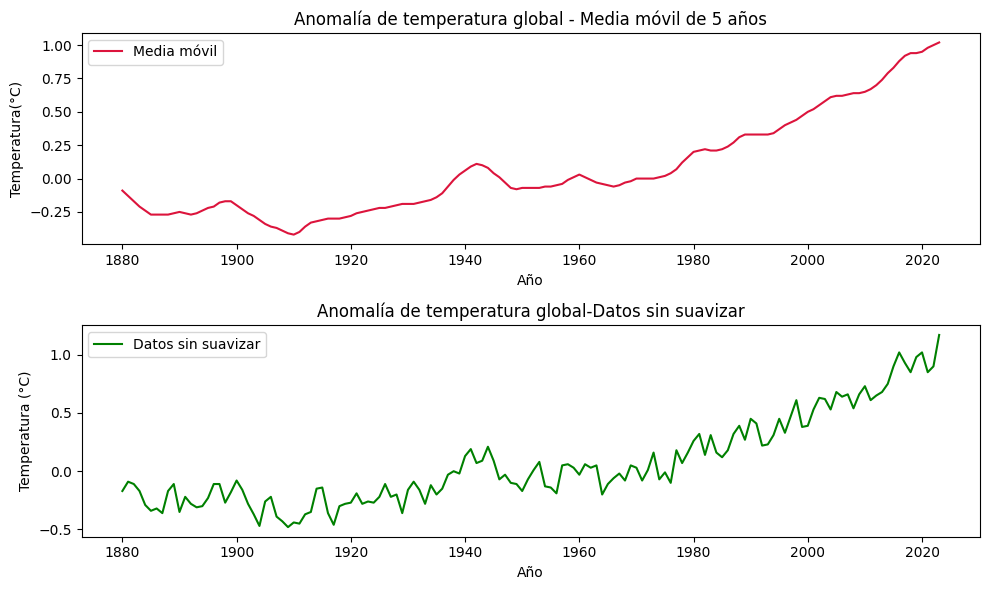

In [10]:
#1).
#2).

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data["Año"],data["Promedio_5"],label="Media móvil",color="crimson")
plt.xlabel("Año")
plt.ylabel("Temperatura(°C)")
plt.title("Anomalía de temperatura global - Media móvil de 5 años")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data["Año"], data["NoSauvizado"],label="Datos sin suavizar",color="green")
plt.xlabel("Año")
plt.ylabel("Temperatura (°C)")
plt.title("Anomalía de temperatura global-Datos sin suavizar")
plt.legend()
plt.tight_layout()
plt.show()

#3).

Estos gráfico muestra el cambio en la temperatura de la superficie global en comparación con el promedio a largo del tiempo (desde al año 1880 hasta el año 2020).

Se observa claramente una tendencia de aumento de la temperatura a lo largo del tiempo en ambos gráficos. Esto es evidente al observar cómo las temperaturas tienden a ser más altas en los años más recientes en comparación con los años más antiguos.

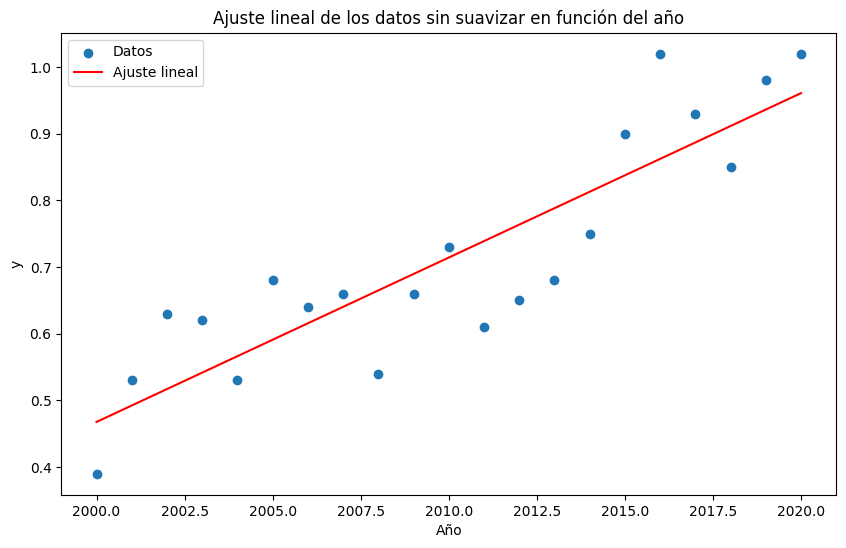

In [11]:
#4).

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b


intervalo = data[(data["Año"] >= 2000) & (data["Año"] <= 2020)]
# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = intervalo["Año"]
y = intervalo["NoSauvizado"]

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.title('Ajuste lineal de los datos sin suavizar en función del año')
plt.xlabel('Año')
plt.ylabel('y')
plt.legend()
plt.show()

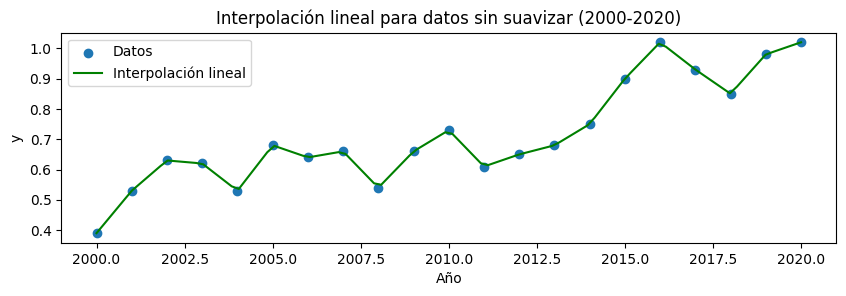

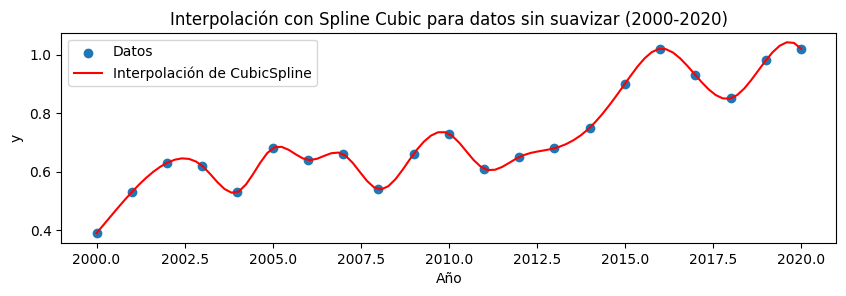

In [12]:
#5).

interpolacion_lineal = interp1d(x, y, kind='linear')  #interpolación lineal
xli=np.linspace(min(x), max(x), 100)
yli=interpolacion_lineal(xli)

PL=CubicSpline(x,y)  #interpolación con cubic spline
Xcu=np.linspace(np.min(x), np.max(x),100)
Ycu=PL(Xcu)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.scatter(x, y, label='Datos')
plt.plot(xli, yli, label='Interpolación lineal', color='green')
plt.xlabel('Año')
plt.ylabel('y')
plt.title("Interpolación lineal para datos sin suavizar (2000-2020)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.scatter(x, y, label='Datos')
plt.plot(Xcu, Ycu, label='Interpolación de CubicSpline', color='red')
plt.xlabel('Año')
plt.ylabel('y')
plt.title("Interpolación con Spline Cubic para datos sin suavizar (2000-2020)")
plt.legend()
plt.show()


#6).

  Vemos que los datos parecen mostrar una tendencia general clara de creciemienrto con cierta variabilidad,por tanto es preferible realizar una interpolación lineal a los datos pues permite modelar y proyectar la tendencia a largo plazo.

In [15]:
#7).
prediccion=linear_func(2030, m, b)
print(f"Predicción de la temperatura para el año 2030: {prediccion:.3} °C")

Predicción de la temperatura para el año 2030: 1.21 °C
